<a href="https://colab.research.google.com/github/AlecBN/data-science-portfolio/blob/main/Alec_Bernal_Estadistica_exploracion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DCDPUAEM/DCDP_2022/blob/master/Tema_2_AnalisisEstadistico/notebook/exercises/Practica_Estadistica_exploracion.ipynb)

# Visualización y Estadística

In [ ]:
# Data manipulation libraries
import numpy as np 
import pandas as pd 

# Data visualisation 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Web scraping 
from bs4 import BeautifulSoup, Comment
from requests import get

## Reading the data
pokemon = pd.read_csv('https://raw.githubusercontent.com/DCDPUAEM/DCDP_2022/main/Tema_2_AnalisisEstadistico/data/Pokemon.csv')

In [ ]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Para el siguiente análisis, deberán realizar las siguientes indicaciones:

    1.- Mostrar el tipo de variables que contiene este archivo.
    
    2.- Descartar columnas innecesarias, aquellas que consideren que no aportarían algo especial para un análisis exploratorio.

    3.- Mostrar una tabla de frecuencias de la columna "Generation" y hacer un plot que muestre cada una de ellas. Considerando valores y porcentajes
    
    4.- Realizar un filtro para generar un dataframe a partir de la columna "Generation" del grupo que contenga más elementos..
    
    5.- Buscar elementos duplicados y descartarlos - Podrían utilizar la función ".str.contains()"

In [ ]:
pokemon.info()# Tipo de variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [ ]:
pokemon.dtypes # versión alternativa 

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [ ]:
# Descarte de columna (s)
pokemon_df = pokemon.drop(["Type 2"], axis=1) #En este caso solo se descarta una columna ya que la columna "#" será importante más adelante
pokemon_df.head(3)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False


In [ ]:
pd.value_counts(pokemon_df['Generation']) # Valor númerico 
#(100*pokemon_df['Generation'].value_counts()/len(pokemon_df['Generation'])).plot(kind='bar')
# Tabla de frecuencias con gráfico

1    166
5    165
3    160
4    121
2    106
6     82
Name: Generation, dtype: int64

In [ ]:
100*pokemon_df['Generation'].value_counts()/len(pokemon_df['Generation']) # Valor Porcentual 

1    20.750
5    20.625
3    20.000
4    15.125
2    13.250
6    10.250
Name: Generation, dtype: float64

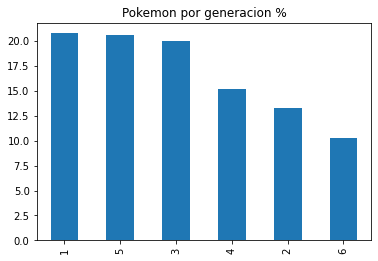

In [ ]:
plot = (100 * pokemon_df['Generation'].value_counts() / len(pokemon_df['Generation'])).plot(kind='bar', title='Pokemon por generacion %')
plot

In [ ]:
# Filtro de columna Generation
pokemon_g1 = pokemon_df[pokemon_df['Generation']==1]
pokemon_g1.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


In [ ]:
# Elementos duplicados y descarte: utilizando la columna #.
pokemon_g1.drop_duplicates(subset='#', keep='first', inplace=True, ignore_index=False)
pokemon_g1

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,405,58,64,58,80,65,80,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
159,147,Dratini,Dragon,300,41,64,45,50,50,50,1,False
160,148,Dragonair,Dragon,420,61,84,65,70,70,70,1,False
161,149,Dragonite,Dragon,600,91,134,95,100,100,80,1,False
162,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True


¡Bien!, En este momento deberíamos tener 151 elementos en nuestro dataframe. ahora realizaremos un análisis exploratorio general del mismo para entender mediante estadística y visualización, el comportamiento de los mismos.

### Atributos de Pokémon y cómo se relacionan entre sí

Como tenemos 151 Pokémon y 6 atributos para cada uno de ellos.

Con ese fin, usaremos un par de cuadrículas de Seaborn. Es una cuadrícula bastante personalizable donde puede mapear diferentes tipos de imágenes en el triángulo superior, triángulo inferior y ejes diagonales.

ValueError: ignored

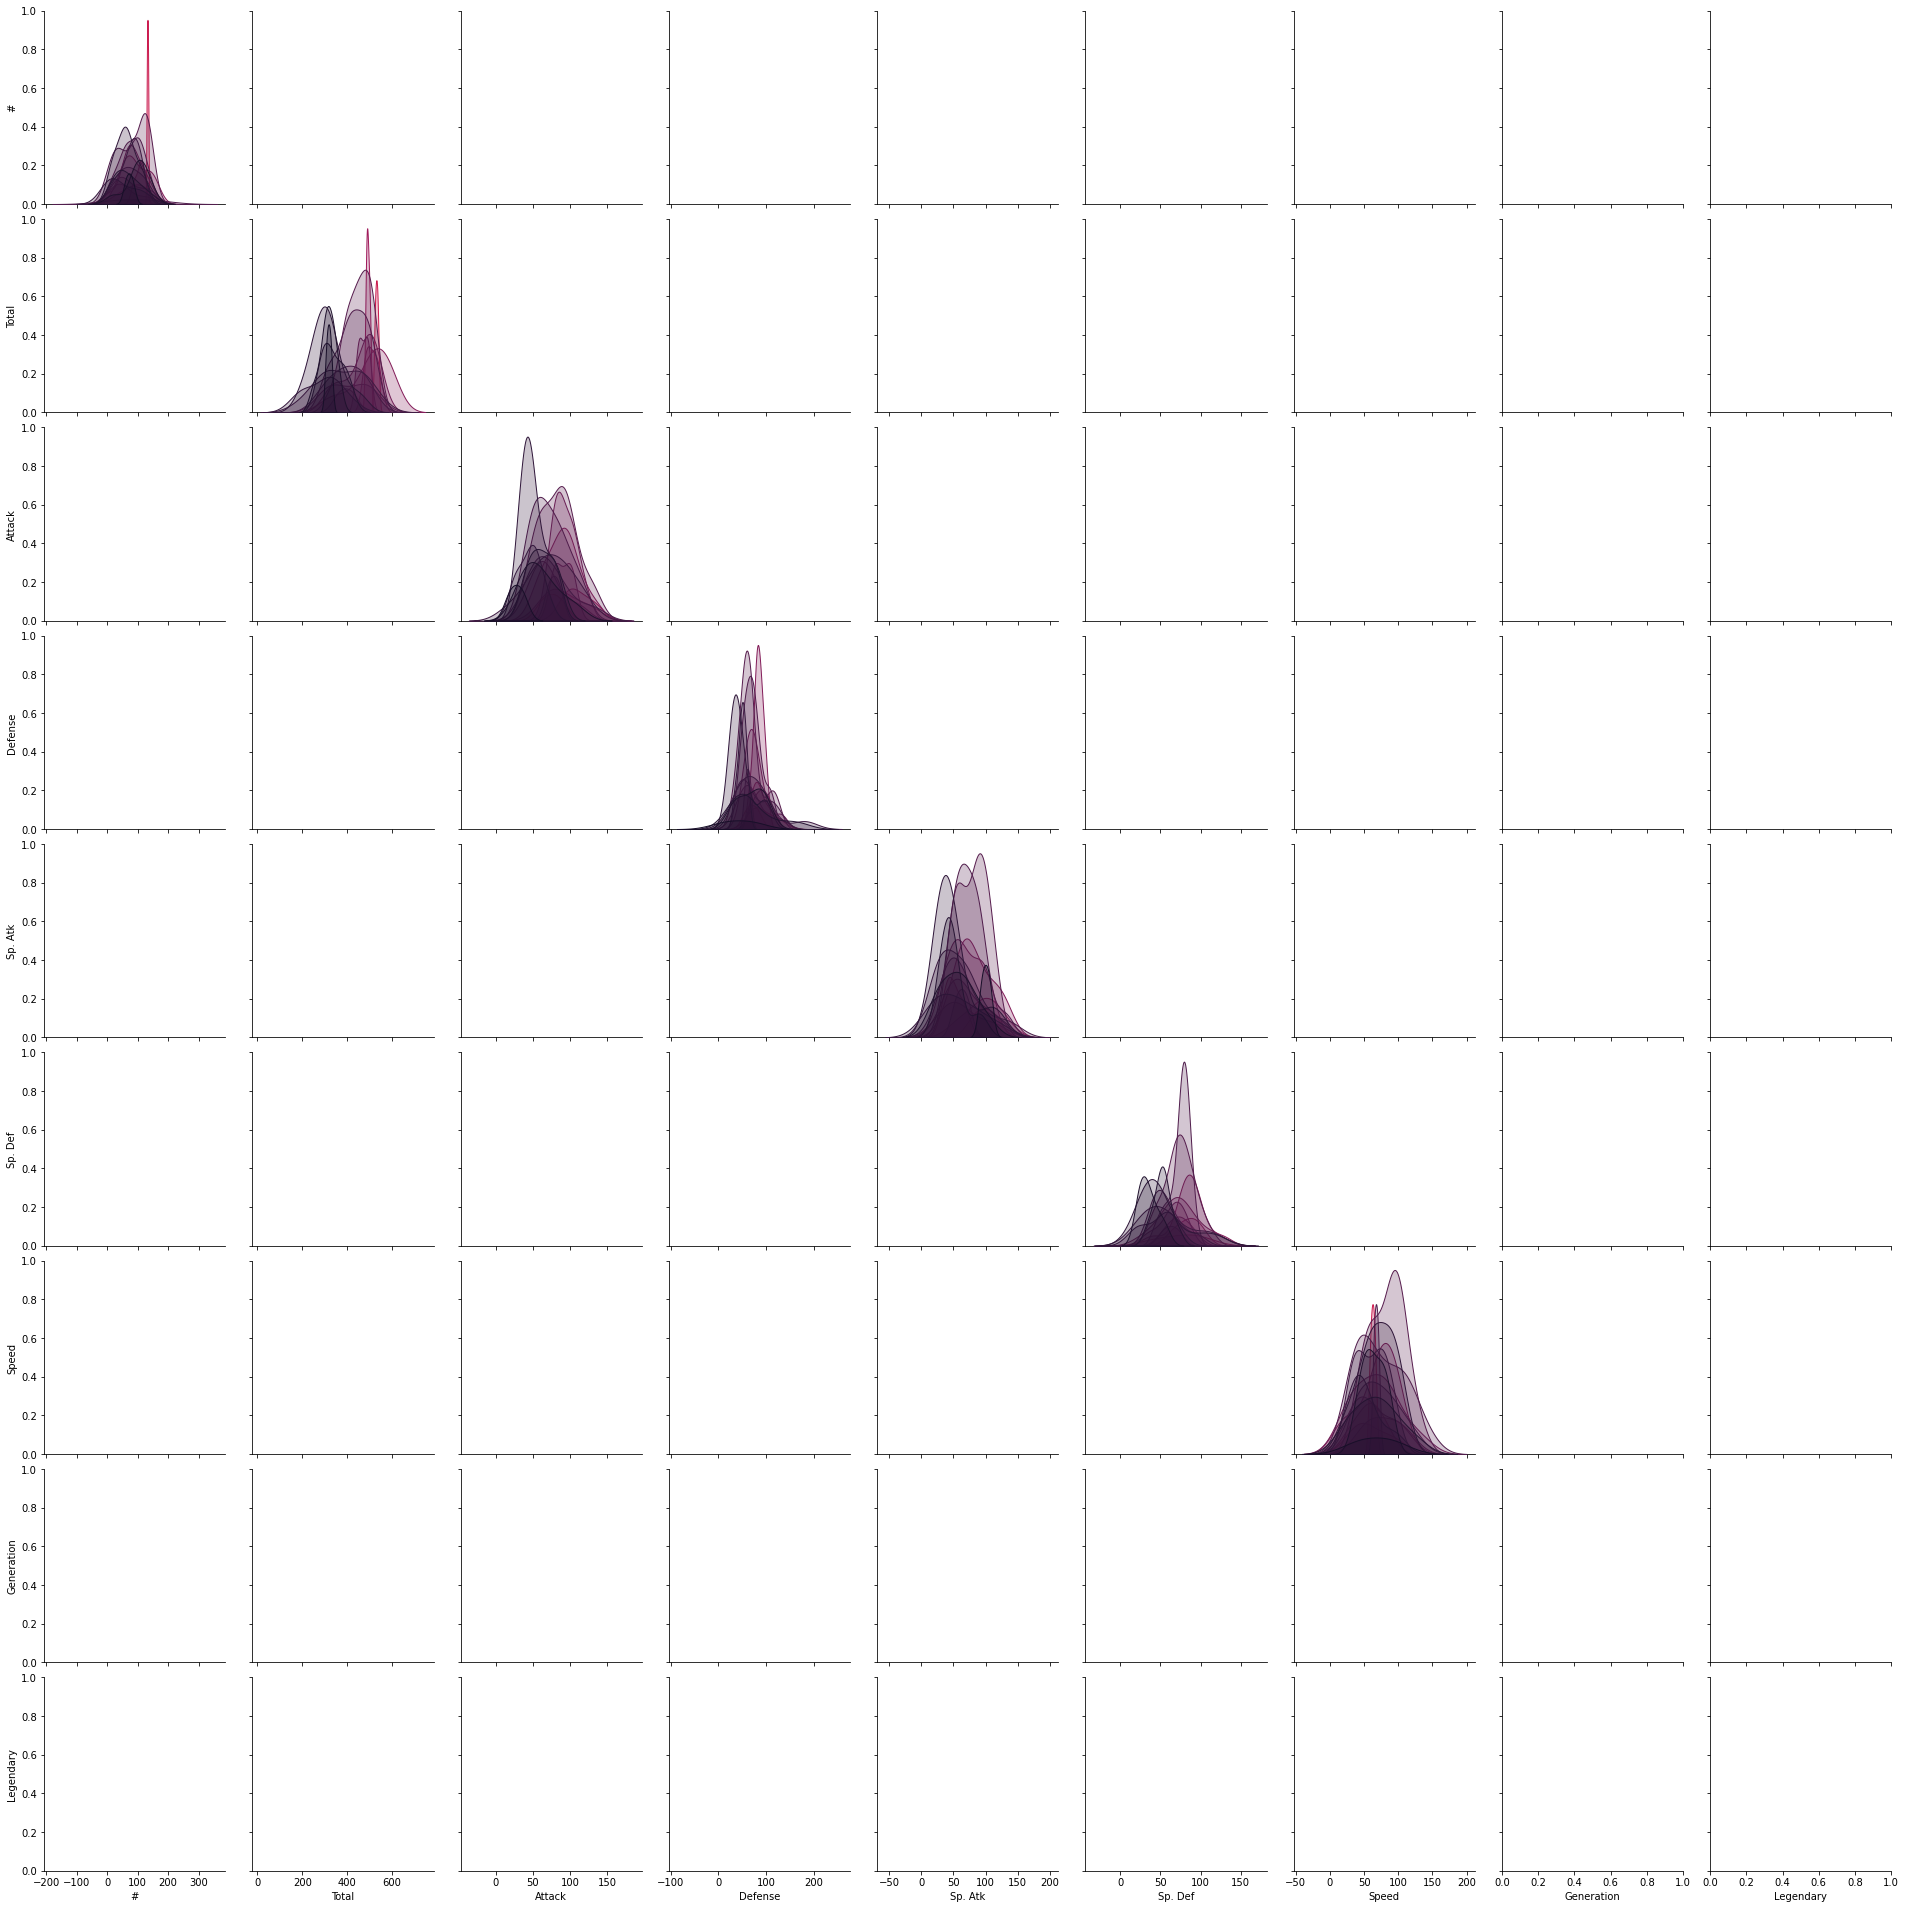

In [ ]:
sns.pairplot(pokemon_g1, hue="HP",height=3,palette='rocket')

In [ ]:
pokemon_g1.columns.to_list()

['#',
 'Name',
 'Type 1',
 'Total',
 'HP',
 'Attack',
 'Defense',
 'Sp. Atk',
 'Sp. Def',
 'Speed',
 'Generation',
 'Legendary']

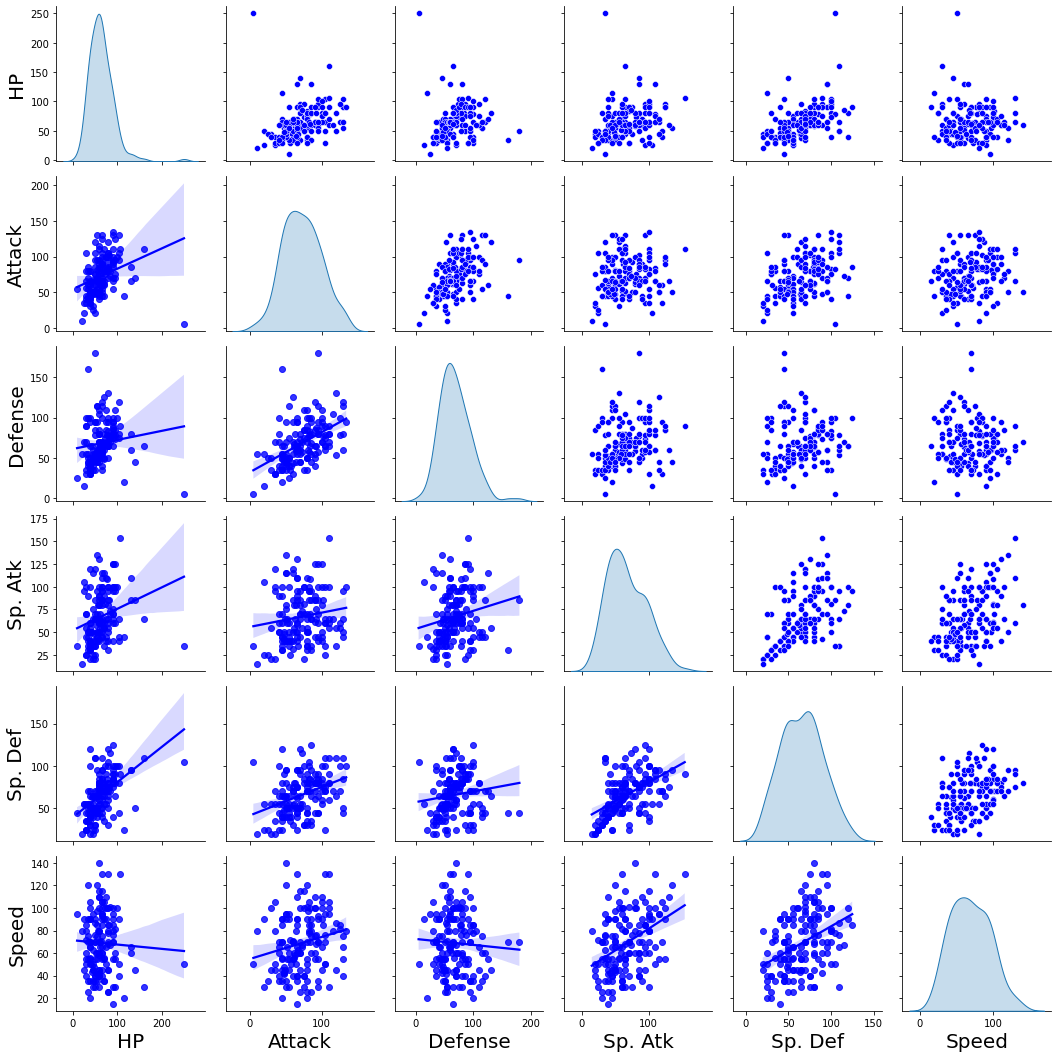

In [ ]:
def my_pairgrid(input_df):
    mpl.rcParams["axes.labelsize"] = 20 #Incrementa los tamaños de las etiquetas
    g = sns.PairGrid(input_df, vars=['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])
    
    "En la diagonal se hará un plot de tipo KDE"
    "kernel density estimate (KDE) es un método de visualización de la distribución de los datos"
    g = g.map_diag(sns.kdeplot, shade=True)
    "Para la matriz inferior, se mostrará un plot de regresión"
    g = g.map_lower(sns.regplot, color = 'b')
    "Para la matriz inferior, se mostrará un plot de dispersión"
    g = g.map_upper(sns.scatterplot, color = 'b')
    return(g)
_ = my_pairgrid(pokemon_g1)    

### Correlación entre atributos

Si bien el primer gráfico fue útil, quizás una mejor manera de visualizar la correlación entre atributos es un mapa de calor con un color más fuerte que indica una correlación más baja.

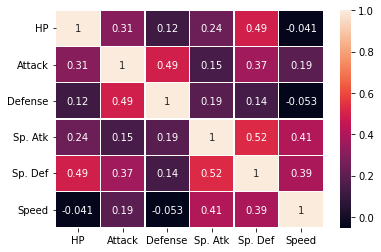

In [ ]:
my_corr = pokemon_g1.loc[:, "HP":"Speed"].corr()
ax = sns.heatmap(my_corr, linewidths=0.3,annot=True)

¿Qué inferencias podemos sacar a partir de estas correlaciones?
Note que el malor máximo que se aprecia es de no más de 0.6, en este caso, lo mismo lo podemos inferir a partir del gráfico anterior

Se puede observar que entre el HP y la velocidad no hay ninguna relación entre éstos, las demás variables se relacionan un poco más aunque aún así sigue habiendo muy poca correlación. Lo mismo pasa en el caso de la defensa y la velocidad.

### Análisis de atributos por pokemon y tipo

Hagamos un análisis de cómo los atributos varían con el tipo. Realizaremos un subplot de 2 renglones por 3 columnas en donde 

In [ ]:
def attr_per_type(input_df, y_attr, hue_attr):
    mpl.rcParams["font.size"] = 18
    #Definir los subplots y de la misma manera, se comparten los ejes
    f, axes = plt.subplots(2, 3, figsize=(20, 20), sharey=True, sharex=True)
    poke_attributes = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
    counter = 0
    for row in range(2):
        for col in range(3):
            sns.boxplot(y = y_attr, x =poke_attributes[counter], data=input_df, ax=axes[row, col])
            axes[row, col].set_title(axes[row, col].get_xlabel())
            axes[row, col]
            counter = counter + 1 
            if (col == 0):
                axes[row, col].yaxis.label.set_visible(False)
                continue
            axes[row, col].yaxis.set_visible(False)
    return(f, axes)

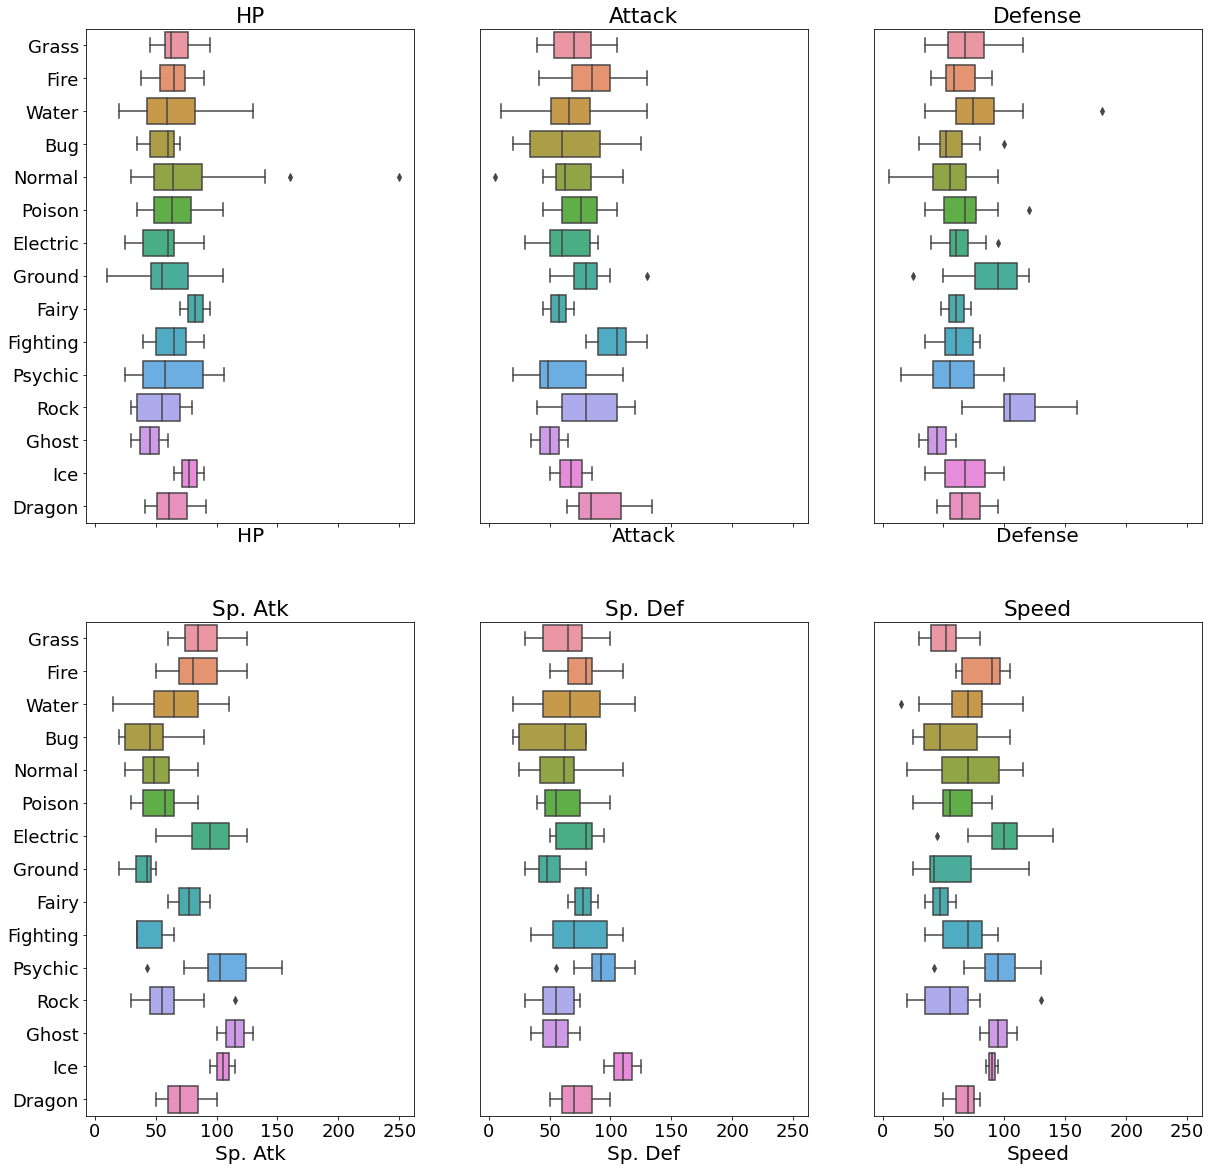

In [ ]:
(f, axes) = attr_per_type(pokemon_g1 , 'Type 1', 'Legendary')

Para cada uno de los atributos, muestra aquellos que corresponderían a posibles outliers, por ejemplo, del atributo **HP**, el punto que se encuentra con valores mayores a 150 son

In [ ]:
pokemon_g1[pokemon_g1["HP"]>=150]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,450,250,5,5,35,105,50,1,False
155,143,Snorlax,Normal,540,160,110,65,65,110,30,1,False


In [ ]:
pokemon_g1[pokemon_g1["HP"]<=15]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
55,50,Diglett,Ground,265,10,55,25,35,45,95,1,False


Haga lo mismo para los demás atributos

In [ ]:
pokemon_g1[pokemon_g1["Attack"]<=10]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,450,250,5,5,35,105,50,1,False
139,129,Magikarp,Water,200,20,10,55,15,20,80,1,False


In [ ]:
pokemon_g1[pokemon_g1["Attack"]>=131]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
161,149,Dragonite,Dragon,600,91,134,95,100,100,80,1,False


In [ ]:
pokemon_g1[pokemon_g1["Defense"]<=10]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
121,113,Chansey,Normal,450,250,5,5,35,105,50,1,False


In [ ]:
pokemon_g1[pokemon_g1["Defense"]>=150]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
98,91,Cloyster,Water,525,50,95,180,85,45,70,1,False
103,95,Onix,Rock,385,35,45,160,30,45,70,1,False


In [ ]:
pokemon_g1[pokemon_g1["Sp. Atk"]<=15]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
139,129,Magikarp,Water,200,20,10,55,15,20,80,1,False


In [ ]:
pokemon_g1[pokemon_g1["Sp. Atk"]>=150]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
162,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True


In [ ]:
pokemon_g1[pokemon_g1["Sp. Def"]<=20]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,10,Caterpie,Bug,195,45,30,35,20,20,45,1,False
16,13,Weedle,Bug,195,40,35,30,20,20,50,1,False
139,129,Magikarp,Water,200,20,10,55,15,20,80,1,False


In [ ]:
pokemon_g1[pokemon_g1["Sp. Def"]>=120]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
79,73,Tentacruel,Water,515,80,70,65,80,120,100,1,False
131,122,Mr. Mime,Psychic,460,40,45,65,100,120,90,1,False
156,144,Articuno,Ice,580,90,85,100,95,125,85,1,True


In [ ]:
pokemon_g1[pokemon_g1["Speed"]<=20]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
44,39,Jigglypuff,Normal,270,115,45,20,45,25,20,1,False
80,74,Geodude,Rock,300,40,80,100,30,30,20,1,False
85,79,Slowpoke,Water,315,90,65,65,40,40,15,1,False


In [ ]:
pokemon_g1[pokemon_g1["Speed"]>=131]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
109,101,Electrode,Electric,480,60,50,70,80,80,140,1,False


Ahora, mostremos la distribución de los datos utilizando el método de displot

HP
Attack


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Defense
Sp. Atk
Sp. Def

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 


Speed


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


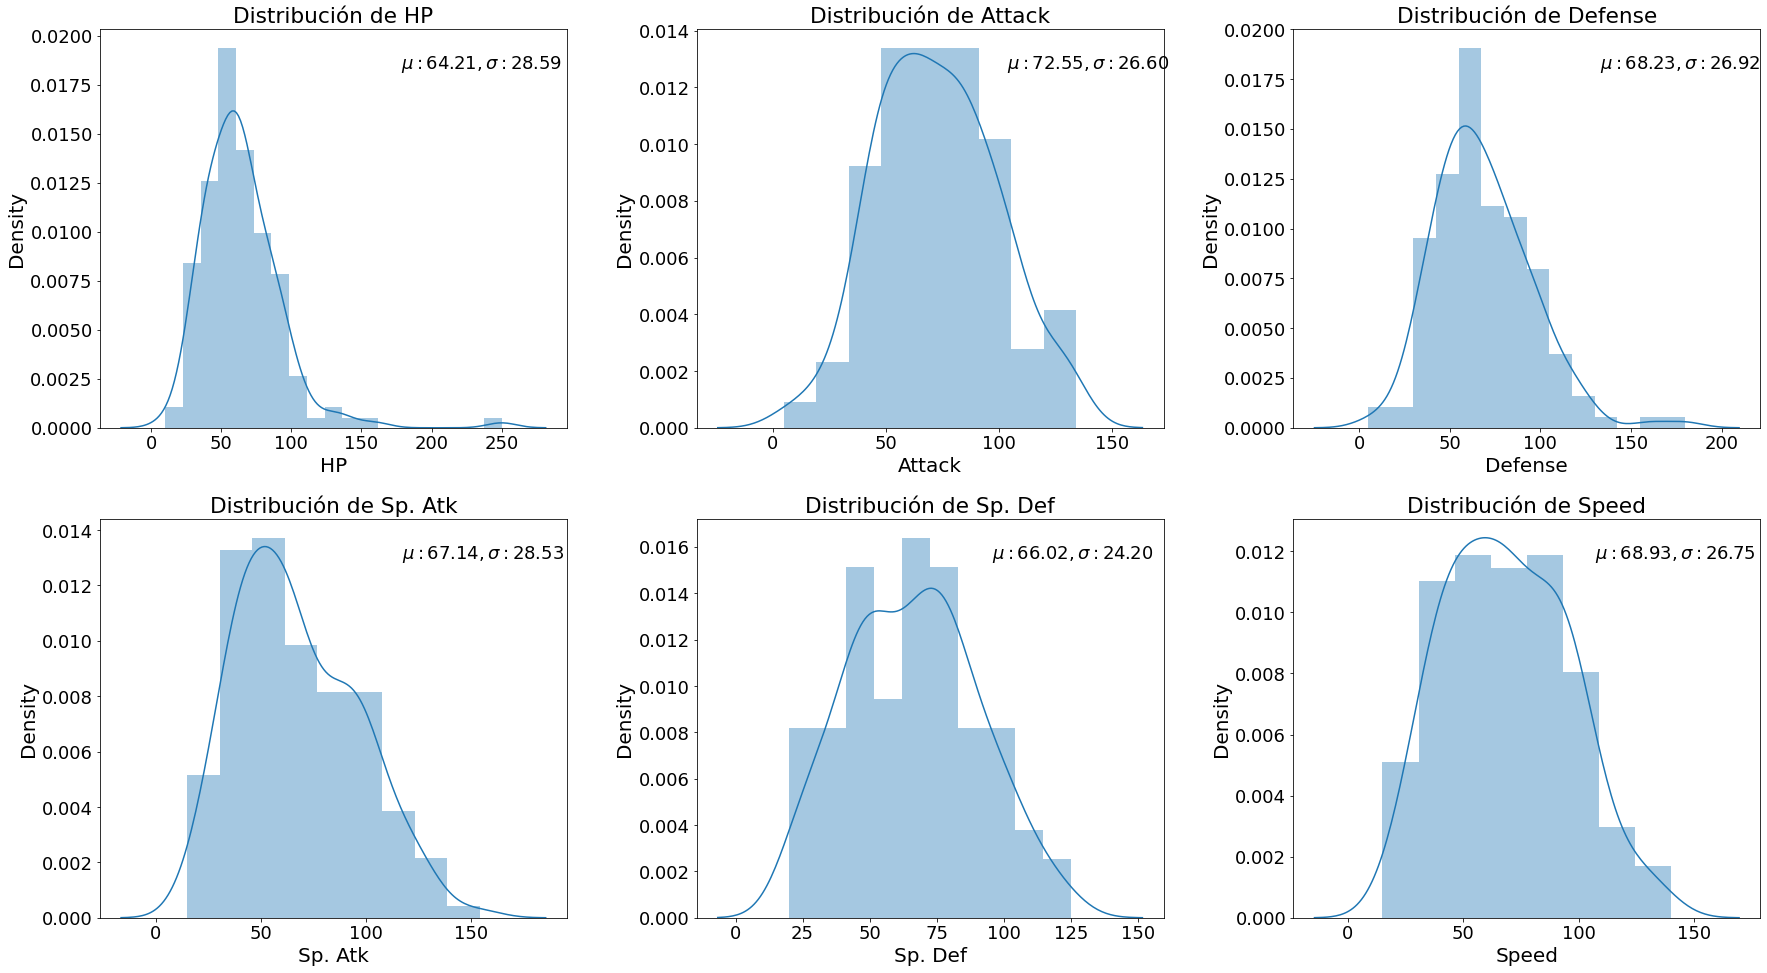

In [ ]:
stats = pokemon_g1.loc[:, 'HP':'Speed']
plt.figure(figsize=(25, 20))

for ii, stat in enumerate(stats):
    print(stat)
    title = "Distribución de {stat}".format(
        stat = stat
    )
    plt.subplot(3, 3, ii+1)
    plt.title(title)
    sns.distplot(pokemon_g1[stat])
    x = plt.gca().get_xlim()[1] * .6
    y = plt.gca().get_ylim()[1] * .9
    plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = pokemon_g1[stat].mean(), sigma=pokemon_g1[stat].std()))
    
plt.tight_layout()
plt.show()

Dado que anteriormente, por los boxplots que realizamos, percibimos que existían datos que parecen ser atípicos. ¿Podremos detectar alguno y mostrar la distribución de *correcta* de los datos sin estos valores?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(107.1652473849573, 0.011757140836278053, '$\\mu:  62.32, \\sigma:  23.01$')

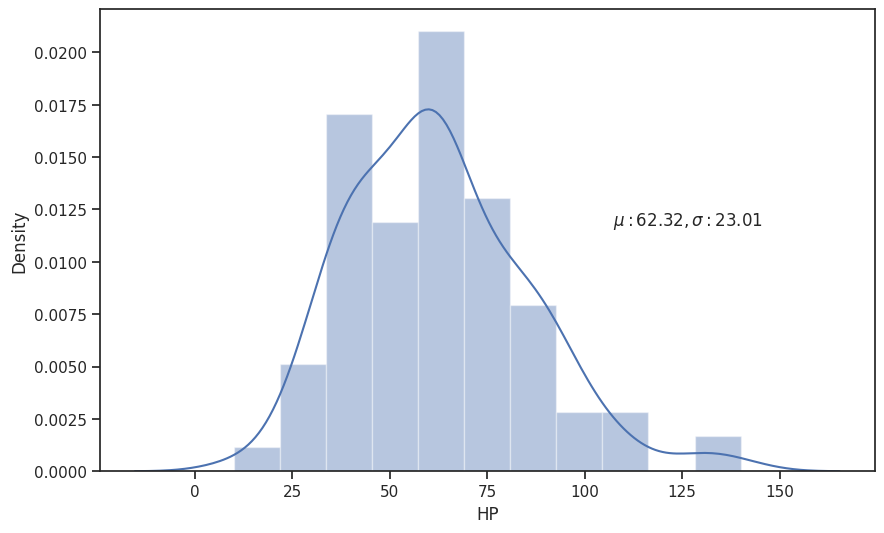

In [ ]:
test1 = pokemon_g1.drop(pokemon_g1.loc[pokemon_g1["HP"]>=150].index)
sns.distplot(test1['HP'])
plt.text(x, y, '$\mu: {mu: .2f}, \sigma: {sigma: .2f}$'.format(mu = test1["HP"].mean(), sigma=test1["HP"].std()))
#df.drop(df.loc[df['Stock']=='Yes'].index, inplace=True)

In [ ]:
def q_test(dataset):
    return (dataset[1] - dataset[0])/(dataset[-1] - dataset[0])

In [ ]:
HP = np.sort(pokemon_g1['HP'])
for val in HP:
  stat1=q_test(HP)
  if stat1 >= 0.26:
    HP = np. delete(HP, -1)

Finalmente, realiza un conteo de valores tomando en cuenta las columnas "Legendary" y "Type 1" para, posteriormente, hacer un countplot de seaborn para desplegar en pantalla una visualización de los conteos respectivos

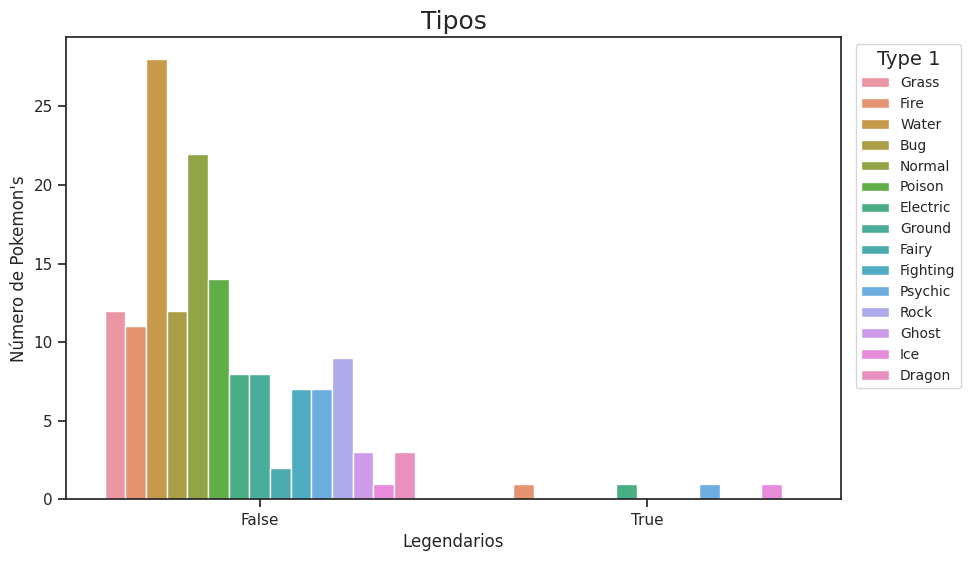

In [ ]:
import seaborn as sns
sns.reset_defaults()
sns.set(rc={'figure.figsize':(10,6)})
sns.set(style='ticks')
ax = sns.countplot(data=pokemon_g1 ,x="Legendary", hue="Type 1")

ax.set_title('Tipos', fontsize="18")

plt.legend(bbox_to_anchor=(1.01, 1), loc=2, title='Type 1',
           title_fontsize='14',
           fontsize='small')

plt.xlabel("Legendarios")
plt.ylabel("Número de Pokemon's")

plt.show()

In [ ]:
pokemon_g1[pokemon_g1.Legendary == True]

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True
